# Generic Box
This code communicates with a component. The component was launched with the command below from the root of the repository:

```shell
$ docker run --rm -it -p 4061:8061 -v ./src/external1.py=/workspace/external.py generic
```


In [1]:
import argparse
import grpc
import io

import matplotlib.pyplot as plt
import PIL.Image as PIL_image
import numpy as np
import cv2
from scipy.io import loadmat,savemat

from importlib.machinery import SourceFileLoader
#In case of importing files from other directory
cotrakcer_pb2 = SourceFileLoader("cotracker_pb2","../protos/cotracker_pb2.py").load_module()
cotrakcer_pb2_grpc = SourceFileLoader("cotracker_pb2_grpc","../protos/cotracker_pb2_grpc.py").load_module()

## Set parameters (GRPC) and data
Set IP and port of the service (the same used in docker run), input data (image in a matfile) and call the service

In [22]:
from PIL import Image

#target='printart.isr.ist.utl.pt:8061'
target='localhost:8061'

# List of file paths (example paths — replace with your actual ones)
video_path = "./apple.mp4"

with open(video_path, "rb") as f:
    video_bytes = f.read()

request = cotrakcer_pb2.CoTrackerRequest(
    video=video_bytes,
    grid_size=32)

channel_opt = [('grpc.max_send_message_length', 512 * 1024 * 1024), ('grpc.max_receive_message_length', 512 * 1024 * 1024)]
channel=grpc.insecure_channel(target,options=channel_opt)
estimator_stub = cotrakcer_pb2_grpc.CoTrackerServiceStub(channel)

#### Do your task. Example: read an image from a matlab file and send it to process

In [27]:
#Name of the method in the service
response = estimator_stub.Forward(request)
#After finishing channel.close

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "Exception calling application: 'NoneType' object has no attribute 'cpu'"
	debug_error_string = "UNKNOWN:Error received from peer ipv6:%5B::1%5D:8061 {grpc_message:"Exception calling application: \'NoneType\' object has no attribute \'cpu\'", grpc_status:2}"
>

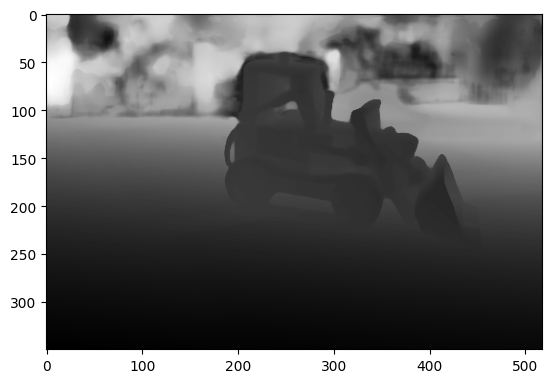

I0000 00:00:1757089929.111042   39587 chttp2_transport.cc:1335] ipv6:%5B::1%5D:8061: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {http2_error:2, grpc_status:14}


In [ ]:
import torch

def bytes_to_tensor(b: bytes) -> torch.Tensor:
    return torch.load(io.BytesIO(b))

depthmap = bytes_to_tensor(response.depth)

plt.imshow(depthmap.squeeze()[0], cmap='gray')

### Run in one single shot 

In [7]:
target='printart.isr.ist.utl.pt:8061'
data_file='../Images/eiffel.mat'
#Para imagens muito grandes buffer grande
channel_opt = [('grpc.max_send_message_length', 512 * 1024 * 1024), ('grpc.max_receive_message_length', 512 * 1024 * 1024)]

with grpc.insecure_channel(target,options=channel_opt) as channel:
    estimator_stub = simplebox_pb2_grpc.SimpleBoxServiceStub(channel)
    with open(data_path, 'rb') as fp:
        data_bytes = fp.read()
    request = simplebox_pb2.matfile(data=data_bytes)
    response=estimator_stub.process(request)
    with open("lixo.mat","wb") as f:
        f.write(response.data)
#channel.close()

NameError: name 'simplebox_pb2_grpc' is not defined

# Check output

In [34]:
with open("lixo.mat","wb") as f:
    f.write(response.data)

In [35]:
a=loadmat("lixo.mat")
a.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pose_enc', 'depth', 'depth_conf', 'world_points', 'world_points_conf', 'images'])